**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [2]:
class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_tr = X
        self.y_tr = y

    def predict(self, X):
        predictions = np.zeros((X.shape[0]))
        best_indices = []
        for j, row in enumerate(X):
            D = self.X_tr - row
            dist = (D**2).sum(axis=1)
            best_indices = np.argsort(dist)[0:self.n_neighbors]
            avg = self.y_tr[best_indices]
            freq = np.zeros((int(self.y_tr.max()+1)))
            for i in avg:
                freq[int(i)] += 1
            predictions[j] = np.argmax(freq)
        return predictions

    def predict_proba(self, X):
        predictions = np.zeros((X.shape[0], self.y_tr.max() + 1))
        best_indices = []
        for j, row in enumerate(X):
            D = self.X_tr - row
            dist = (D**2).sum(axis=1)
            best_indices = np.argsort(dist)[0:self.n_neighbors]

            avg = self.y_tr[best_indices]
            freq = np.zeros((int(self.y_tr.max()+1)))
            for i in avg:
                freq[int(i)] += 1
            predictions[j] = freq/freq.sum()
        return predictions

    def score(self, X, y):
        pred = self.predict(X)
        correct = 0
        for i in range(X.shape[0]):
            if pred[i] == y[i]:
                correct += 1
        return correct/float(X.shape[0])


**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.05 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.8 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.1 ms


array([2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 937 µs


array([2., 1., 2., 0., 0., 2., 1., 1., 1., 2., 0., 2., 1., 0., 0.])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 654 µs


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 981 µs


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Best score  1.0  при n_neighbors  21


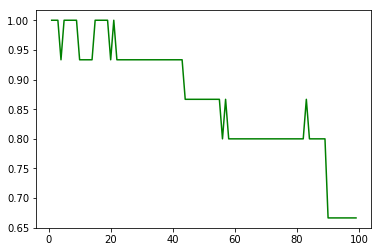

In [15]:
# Задание 3
neighbors = range(1, 100)
scr = []
score_best = 0
nbr_best = 0
for k in neighbors:
    knn = MyKNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    s = knn.score(X_test, y_test)
    if s >= score_best:
        score_best = s
        nbr_best = k
    scr.append(s)
print "Best score ", score_best, " при n_neighbors ", nbr_best
plt.plot(neighbors, scr, color='green', label='score')


**MNIST**

In [ ]:
mnist = fetch_mldata('MNIST original')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [ ]:
%time clf.fit(X_train, y_train)

In [ ]:
%time my_clf.fit(X_train, y_train)

In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn - библиотека для визуализации данных , основана на matplotlib. 
# Содержит более адекватные дефолтные настройки оформления графиков. 
# Также в библиотеке есть достаточно сложные типы визуализации, 
# которые в matplotlib потребовали бы большого количество кода.

# matplotlib - также библиотека для визуализации данных

# train_test_split - разделение массивов или матриц на случайные train и test подмножества 

# Pipeline (from sklearn.pipeline import Pipeline) - метод преобразований с конечной оценкой
# Цель - собрать несколько шагов вместе

# StandardScaler (from sklearn.preprocessing import StandardScaler) - метод стандартизации объектов
# путем удаления среднего значения и масштабирования до дисперсии единиц измерения

# ClassifierMixin - класс для всех классификаторов из пакета scikit-learn

# NeighborsBase - базовый класс для оценок ближайших соседей ( обучение "без учителя" )

# KNeighborsMixin - класс поиска k соседей

# SupervisedIntegerMixin - класс для модели обучения "с учителем"